In [49]:
import pandas as pd

# Încarcă setul de date
data = pd.read_csv('day.csv')
data.head()  # Afișează primele 5 rânduri

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Preprocesarea datelor

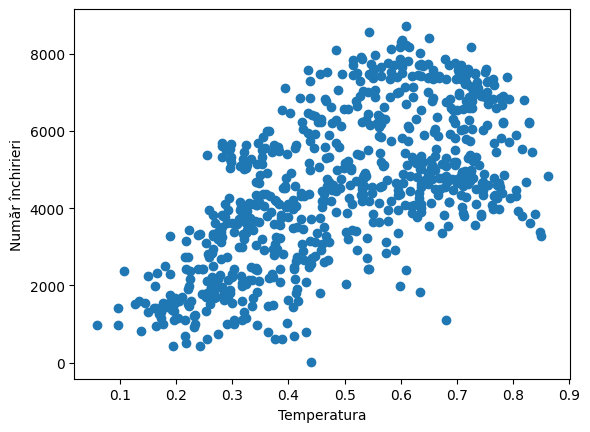

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.scatter(data['temp'], data['cnt'])
plt.xlabel('Temperatura')
plt.ylabel('Număr închirieri')
plt.show()

In [51]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [52]:
# chech for null values
data.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [53]:
Q1 = data['cnt'].quantile(0.25)
Q3 = data['cnt'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['cnt'] >= Q1 - 1.5 * IQR) & (data['cnt'] <= Q3 + 1.5 * IQR)]

Linear Regression

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
# Definirea variabilelor
X = data[['temp', 'hum', 'windspeed']]
y = data['cnt']

# datele antrenament și test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# model train
model_lr = LinearRegression()
regr = model_lr.fit(X_train, y_train)

In [60]:
# prediction and evaluation
y_pred = model_lr.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred)) #arată cât de mult diferă predicțiile modelului(y_pred) față de valorile reale (y_test)
print("R2:", r2_score(y_test, y_pred)) #arată cât de bine se potrivește modelul

MSE: 2020722.2320442528
R2: 0.49606445111931263


Modelul k-NN

In [61]:
from sklearn.neighbors import KNeighborsRegressor

# Crearea si antrenarea modelului k-NN
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train, y_train)

# prediction and avaluation
y_pred_knn = model_knn.predict(X_test)
print("MSE k-NN:", mean_squared_error(y_test, y_pred_knn))
print("R2 k-NN:", r2_score(y_test, y_pred_knn))

MSE k-NN: 2151952.3115646257
R2 k-NN: 0.46333778482938226


Compararea modelelor

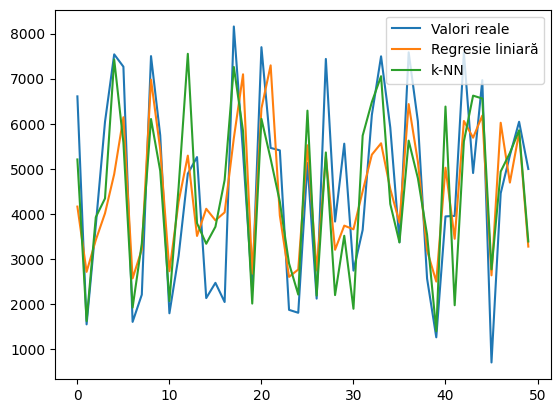

In [62]:
plt.plot(y_test.values[:50], label='Valori reale')
plt.plot(y_pred[:50], label='Regresie liniară')
plt.plot(y_pred_knn[:50], label='k-NN')
plt.legend()
plt.show()

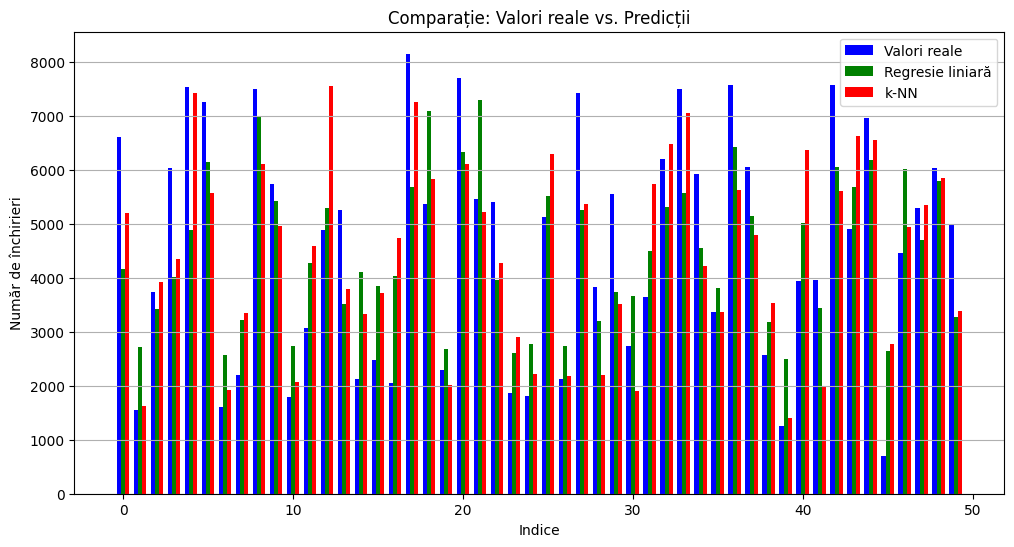

In [63]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(50)  # Indici pentru primele 50 de valori
width = 0.25  # Lățimea barelor

plt.figure(figsize=(12, 6))
plt.bar(x - width, y_test.values[:50], width, label='Valori reale', color='blue')
plt.bar(x, y_pred[:50], width, label='Regresie liniară', color='green')
plt.bar(x + width, y_pred_knn[:50], width, label='k-NN', color='red')

plt.xlabel('Indice')
plt.ylabel('Număr de închirieri')
plt.title('Comparație: Valori reale vs. Predicții')
plt.legend()
plt.grid(True, axis='y')
plt.show()

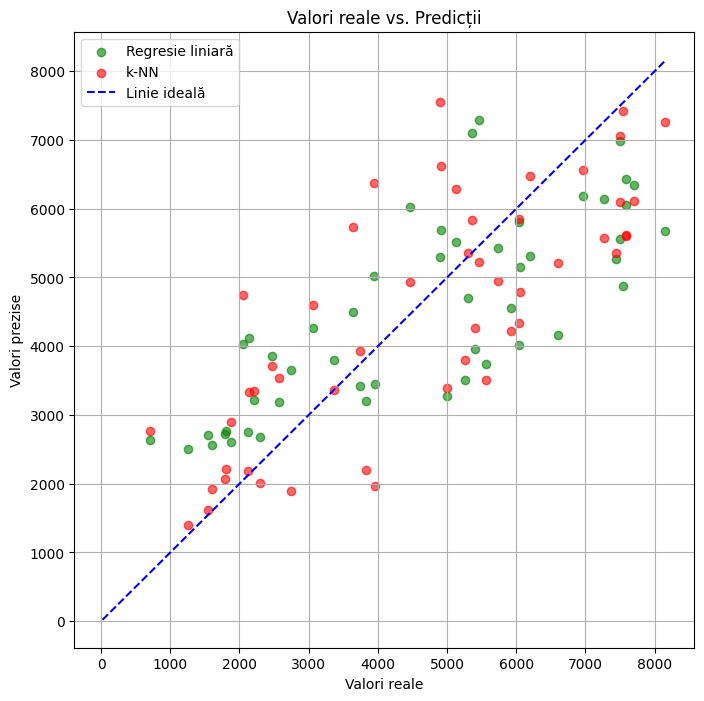

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(y_test.values[:50], y_pred[:50], color='green', label='Regresie liniară', alpha=0.6)
plt.scatter(y_test.values[:50], y_pred_knn[:50], color='red', label='k-NN', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', label='Linie ideală')

plt.xlabel('Valori reale')
plt.ylabel('Valori prezise')
plt.title('Valori reale vs. Predicții')
plt.legend()
plt.grid(True)
plt.show()

Interfata Streamlit

In [65]:
! pip install streamlit -q

In [66]:
!wget -q -O - ipv4.icanhazip.com

34.86.93.221


In [67]:
! streamlit run app.py & npx localtunnel --port 8501



⠙
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.86.93.221:8501

⠹⠸⠼⠴⠦⠧your url is: https://lovely-ducks-see.loca.lt
2025-02-26 17:48:00.856 Uncaught app execution
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/streamlit/runtime/scriptrunner/exec_code.py", line 121, in exec_func_with_error_handling
    result = func()
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 591, in code_to_exec
    exec(code, module.__dict__)
  File "/content/app.py", line 10, in <module>
    pred_lr = model_lr.predict(input_data)[0]
              ^^^^^^^^
NameError: name 'model_lr' is not defined
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/lo